In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
def get_flows(lc):
    # lc = "./scp/r2"
    # lc = "./dijk"
    loc = lc + "/flowsOut/"
    rpts = os.listdir(loc)
    flws = []

    for i in rpts:
        fls = os.listdir(loc + i)
        flws_i = []
        fls.sort()
        fls.sort(key=lambda x : int(x[5:]))
        
        for j in fls:
            flws_j = []
            flsO = os.listdir(loc + f"{i}/{j}")
            flsO.sort()

            for k in flsO:
                f = open(loc + f"{i}/{j}/{k}" , 'r')
                ar = [ float(x) for x in f.readline().split(",")[7:] ]
                if ar == []:
                    print(loc + f"{i}/{j}/{k}")
                    dts , bws , jts , los , tos = 0, 0 , 0 , 0 ,0 
                else:
                    dts , bws , jts , los , tos = ar[0] , ar[1] , ar[2] , ar[3] , ar[4] 
                    
                f.close()
                flws_j.append([ dts , bws , jts , los , tos ])

            flws_i.append(flws_j)
            
        flws.append(flws_i)

    flws = np.array(flws)
    print(flws.shape)
    return flws


In [3]:
dij_flows = get_flows("./dijk/")
r2_flows = get_flows("./scp/r2/")

(1, 20, 3, 5)
./scp/r2//flowsOut/4/flows4/flow_000.txt
./scp/r2//flowsOut/4/flows16/flow_002.txt
./scp/r2//flowsOut/9/flows12/flow_001.txt
./scp/r2//flowsOut/5/flows11/flow_000.txt
./scp/r2//flowsOut/5/flows14/flow_000.txt
./scp/r2//flowsOut/8/flows11/flow_000.txt
./scp/r2//flowsOut/8/flows14/flow_001.txt
./scp/r2//flowsOut/3/flows9/flow_001.txt
./scp/r2//flowsOut/1/flows4/flow_001.txt
./scp/r2//flowsOut/1/flows10/flow_001.txt
./scp/r2//flowsOut/7/flows15/flow_002.txt
./scp/r2//flowsOut/2/flows6/flow_001.txt
./scp/r2//flowsOut/0/flows0/flow_000.txt
./scp/r2//flowsOut/0/flows3/flow_002.txt
./scp/r2//flowsOut/11/flows19/flow_001.txt
./scp/r2//flowsOut/12/flows15/flow_002.txt
./scp/r2//flowsOut/6/flows0/flow_001.txt
./scp/r2//flowsOut/6/flows3/flow_000.txt
./scp/r2//flowsOut/6/flows3/flow_001.txt
./scp/r2//flowsOut/6/flows13/flow_001.txt
./scp/r2//flowsOut/6/flows14/flow_000.txt
(13, 20, 3, 5)


In [43]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("dark")

In [79]:
rpt_id = 1
val_id = 1

<AxesSubplot:xlabel='idt', ylabel='pr'>

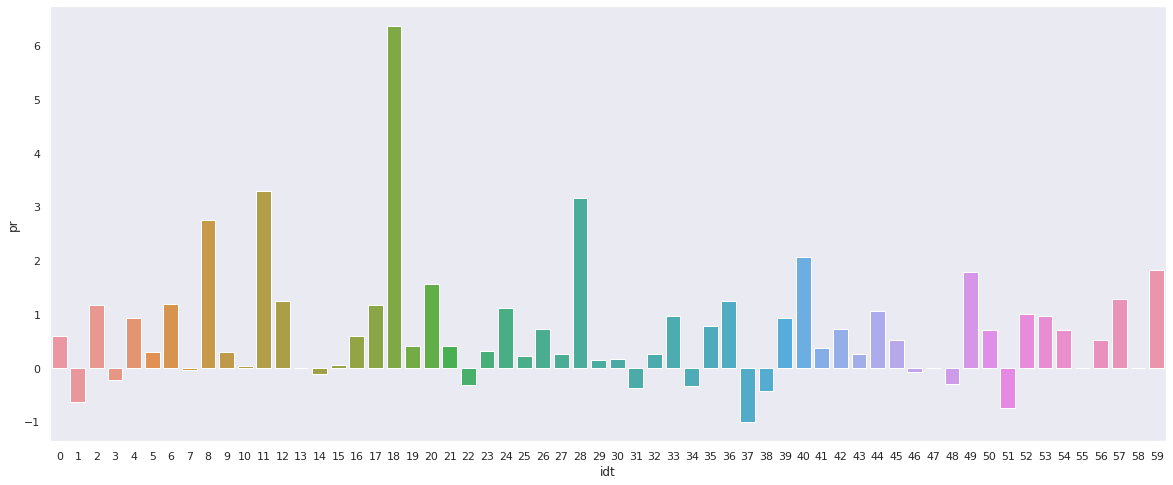

In [80]:
sns.barplot()
df_dr= {
    "idt" : range(60),
     "r2" : r2_flows[rpt_id,:,:,val_id].flatten(), 
    "dij" : dij_flows[0,:,:,val_id].flatten() }
df_dr= pd.DataFrame(df_dr)
df_dr["pr"] = (df_dr["r2"] - df_dr["dij"] )/ df_dr["dij"]
sns.barplot( y="pr", x="idt", data=df_dr)

<AxesSubplot:xlabel='idt', ylabel='value'>

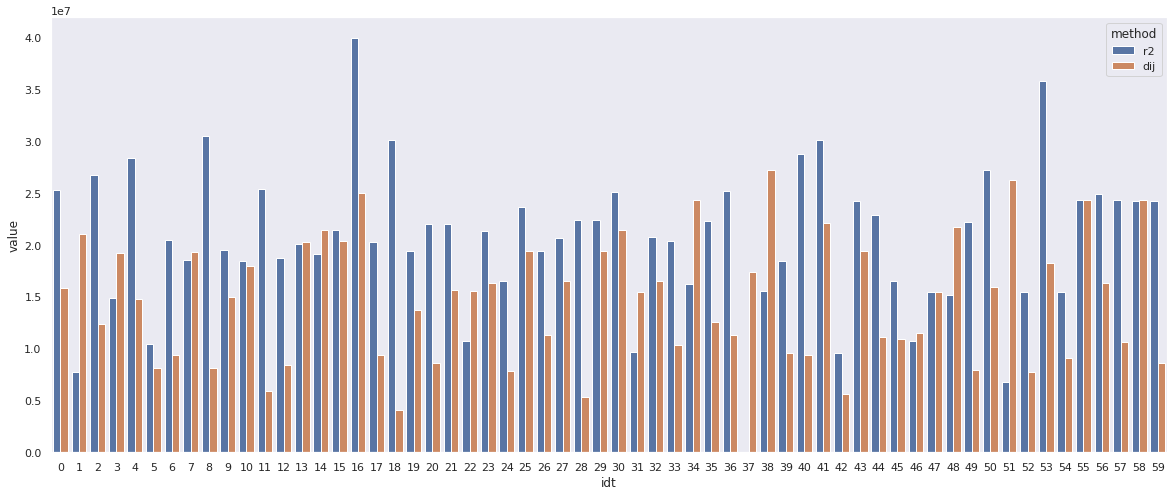

In [81]:
df_dr2 =  pd.melt(df_dr, id_vars = ["idt","pr"] , var_name="method" , value_name="value")
sns.barplot( y="value", x="idt",hue="method" , data=df_dr2)

In [61]:
lc = "./scp/r2/"

In [86]:
sp_file = open( lc + "splitting.txt" , 'r')

t_seq = []
t_buf = []

sp_data = []
b_data = []
bf_data = [[] for x in range(7)]
ct = 1
for i in sp_file.readlines():
    if i[0] == "A":
        dt = i.split(":")[1]
        reqId = int(dt[1])
        pth = [ int(x) for x in dt[4:dt.index("]")].split(',') ]
        bw = float(i.split(" ")[-1])
        bf_data[reqId].append( [pth , bw] )
    elif i[0] == "D":
        ct += 1
        t_buf.append(i.split(" ")[1].strip())
        b_data.append(bf_data)

        if ct % 20 == 0:
            t_seq.append(t_buf)
            sp_data.append(b_data)
            b_data = []
            t_buf = []

        bf_data = [[] for x in range(7)]
    
    elif i[0] == "S":
        t_buf.append( i.split(" ")[1].strip() )

t_seq = np.array(t_seq)
t_seq = np.expand_dims(t_seq, 2)
t_seq = np.repeat(t_seq, 3, axis=2)
t_seq.shape

(13, 20, 3)

In [93]:
rpt = np.array(range(13))
rpt = np.expand_dims(rpt, axis=[1,2])
rpt = np.repeat( np.repeat(rpt, 20, axis=1) , 3 , axis=2 )

In [136]:
seq = np.array(range(3))
seq = np.expand_dims(seq, axis=[0,1])
seq = np.repeat( np.repeat(seq, 20, axis=1) , 13 , axis=0 )
seq[0,:,0] , seq[1,:,0] , seq[0,0,:] , seq.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 2]),
 (13, 20, 3))

In [150]:
fid = np.array(range(20))
fid = np.expand_dims(fid, axis=[0,2])
fid = np.repeat( np.repeat(fid, 3, axis=2) , 13 , axis=0 )

In [151]:
val_id , r2_flows[:,:,:,val_id].shape ,t_seq.shape, rpt.shape , seq.shape, fid.shape

(1, (13, 20, 3), (13, 20, 3), (13, 20, 3), (13, 20, 3), (13, 20, 3))

rpt, flowid, seq

In [157]:
df_rp = {
    "val" : r2_flows[:,:,:,val_id].flatten() , 
    "rpt" : rpt.flatten(),
    "seq" : seq.flatten(),
    "flowid" : fid.flatten(),
    "id" : t_seq.flatten()
}
df_rp = pd.DataFrame(df_rp)
df_rp["fl-sq"] = df_rp["flowid"].apply(str) + "-" +  df_rp["seq"].apply(str)
df_rp["id"] = pd.to_datetime(df_rp["id"])
df_rp["id2"] = np.argsort(df_rp["id"])

<AxesSubplot:xlabel='id', ylabel='val'>

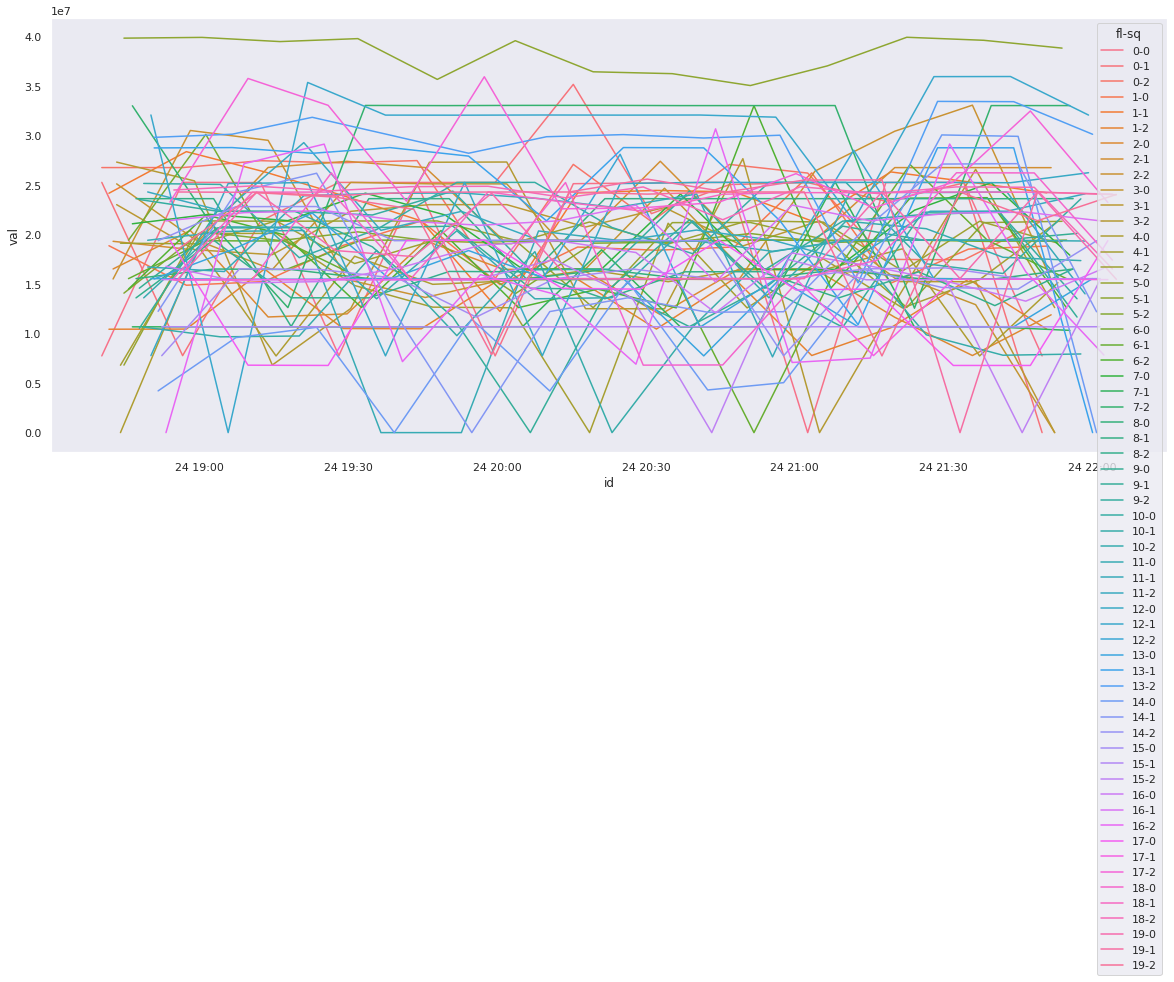

In [158]:
sns.lineplot(y="val", x="id" , hue="fl-sq" , data=df_rp )

<AxesSubplot:xlabel='id', ylabel='val'>

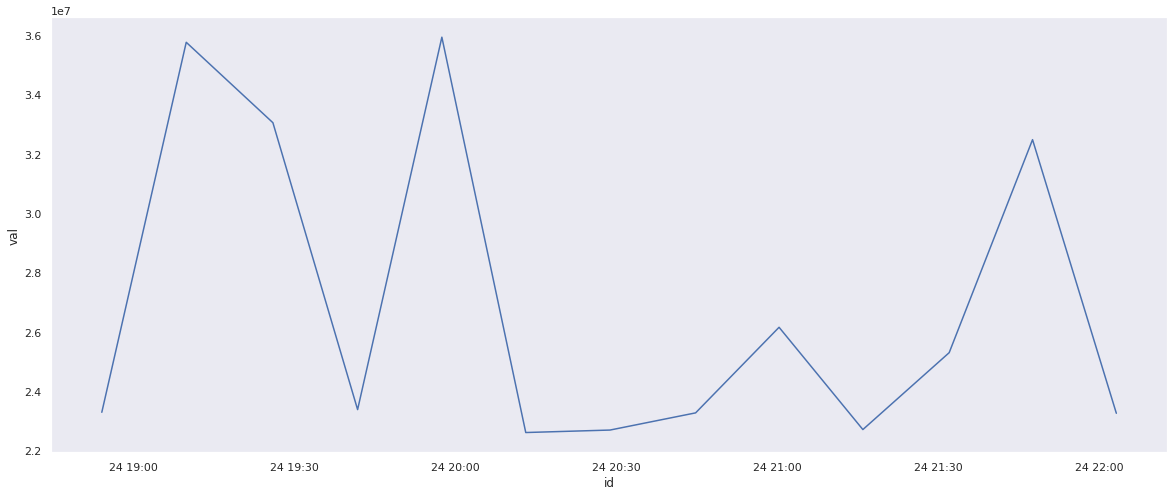

In [160]:
fl_sq_id = "17-2"
sns.lineplot(y="val" , x="id" , data=df_rp[df_rp["fl-sq"] == fl_sq_id] )